In [1]:
#import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
#read the file 
df = pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
#check the dtypes 
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
#check values 
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#check null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#drop instant column
df = df.drop(['instant'], axis=1)

In [9]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#lets map the season, month, year, weekday, weathersit features
df['season'] = df['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall' , 4 : 'winter'})
df['mnth'] = df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weekday'] = df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
df['weathersit'] = df['weathersit'].map(({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'}))

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [12]:
#rename columns for better readability 
df.rename(columns={'mnth':'month','yr':'year','hum':'humidity','cnt':'count'}, inplace = True)

In [13]:
df.tail()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
725,27-12-2019,spring,1,Dec,0,Thu,1,Mist + Cloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,spring,1,Dec,0,Fri,1,Mist + Cloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,spring,1,Dec,0,Sat,0,Mist + Cloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,spring,1,Dec,0,Sun,0,Clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,31-12-2019,spring,1,Dec,0,Mon,1,Mist + Cloudy,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [14]:
#lets split the data between categorical and numerical types 
num_vars = ['temp','atemp','humidity','windspeed','casual','count','registered']
cat_vars = ['season','year','month','holiday','weekday','workingday','weathersit']

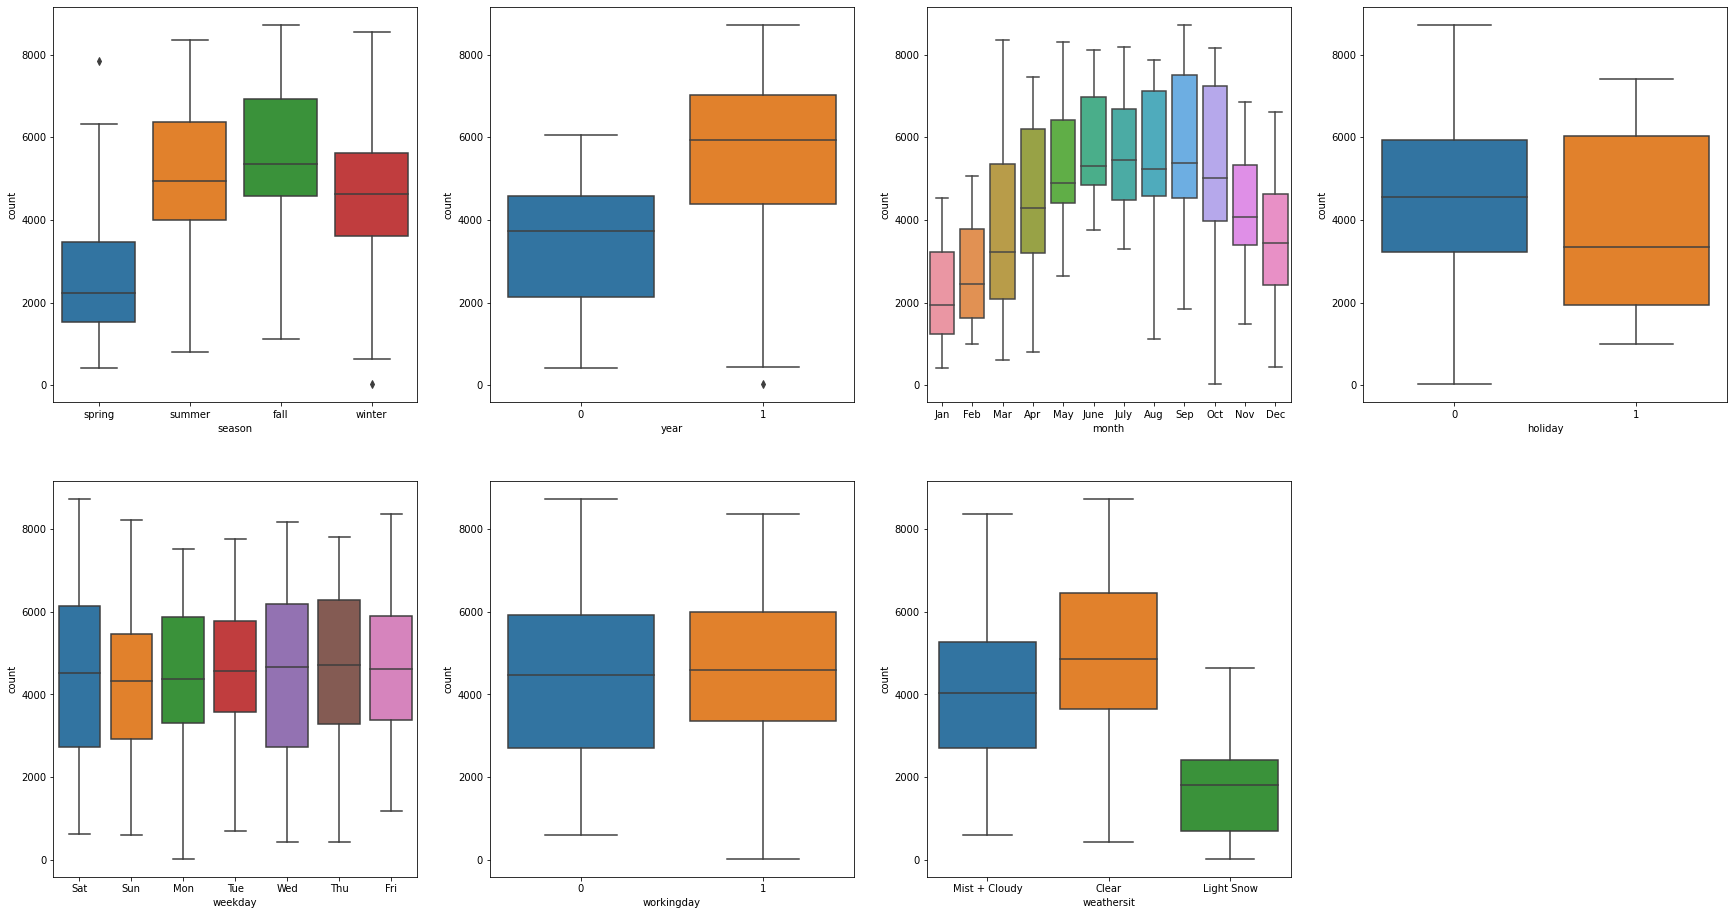

In [15]:
#plot the cat_vars for better understanding 
plt.figure(figsize=(30,16))
plt.subplot(2,4,1)
sns.boxplot(x = 'season' , y = 'count', data=df)
plt.subplot(2,4,2)
sns.boxplot(x = 'year' , y = 'count', data=df)
plt.subplot(2,4,3)
sns.boxplot(x = 'month' , y = 'count', data=df)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday' , y = 'count', data=df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday' , y = 'count', data=df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday' , y = 'count', data=df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit' , y = 'count', data=df)
plt.show()

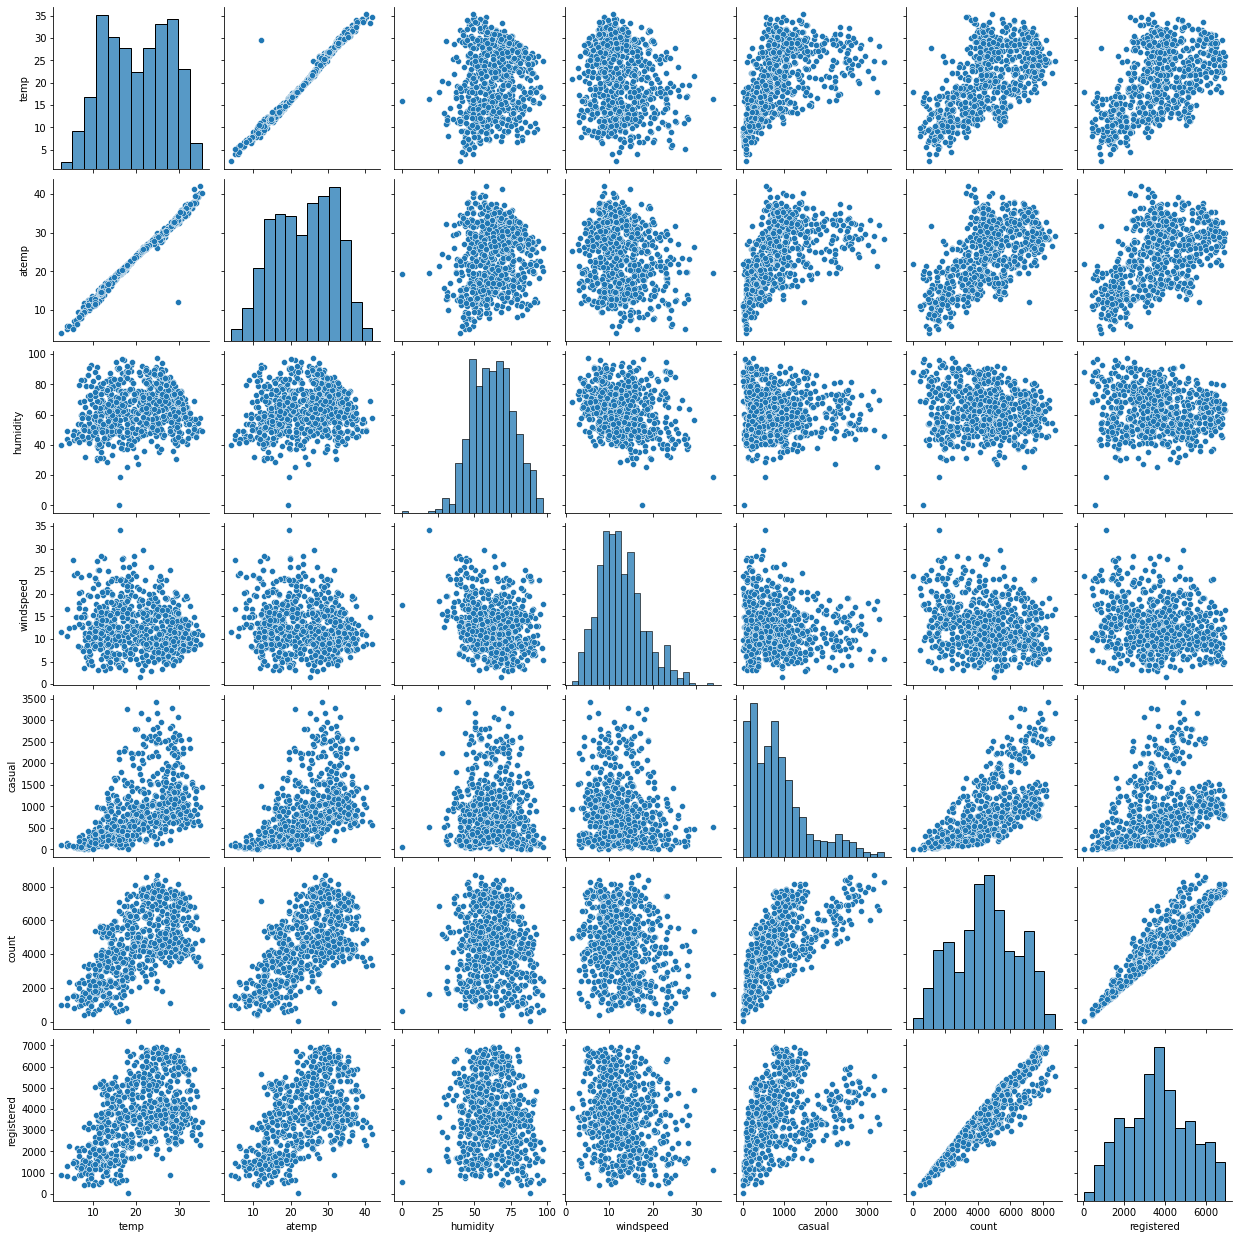

In [16]:
#plot the num_vars
sns.pairplot(df, vars=num_vars)
plt.show()

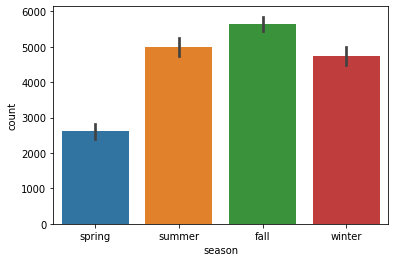

In [17]:
#lets dig deeper into the categorical variables 
#plot season against count
sns.barplot('season','count' , data=df)
plt.show()

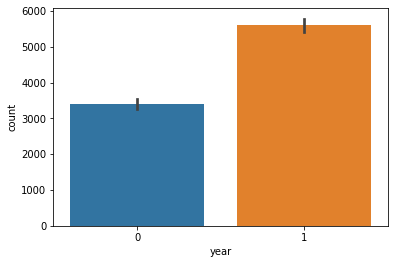

In [18]:
#plot year against count 0 : 2018, 1 : 2019
sns.barplot('year','count' , data=df)
plt.show()

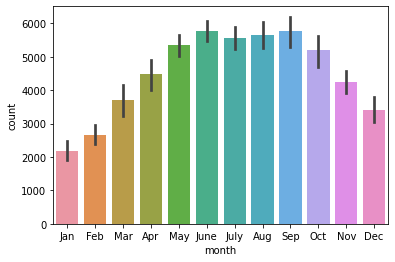

In [19]:
#plot month against count
sns.barplot('month','count' , data=df)
plt.show()

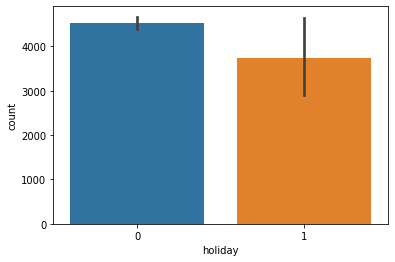

In [20]:
#plot holiday against count
sns.barplot('holiday','count' , data=df)
plt.show()

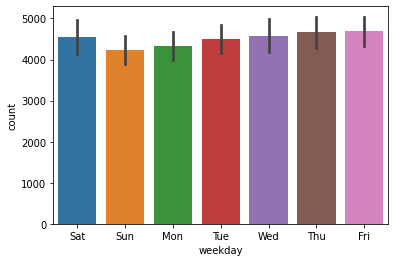

In [21]:
#plot weekday against count
sns.barplot('weekday','count' , data=df)
plt.show()

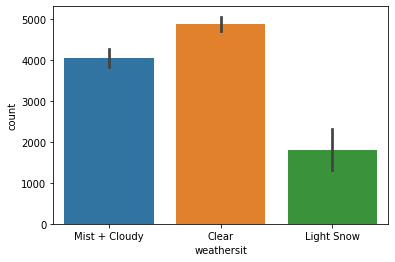

In [22]:
#plot weathresit against count
sns.barplot('weathersit','count' , data=df)
plt.show()

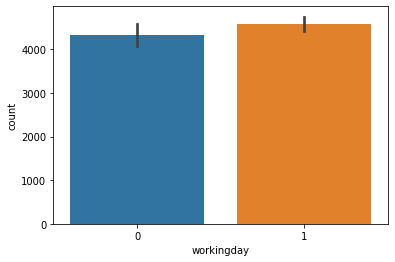

In [23]:
#plot workingday against count
sns.barplot('workingday','count' , data=df)
plt.show()

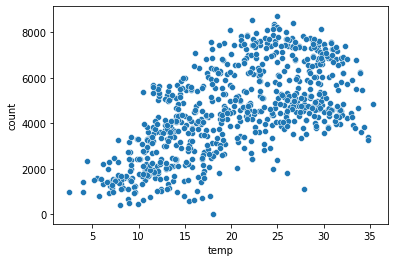

In [24]:
#plot the temp feature 
sns.scatterplot(x='temp', y='count', data=df)
plt.show()

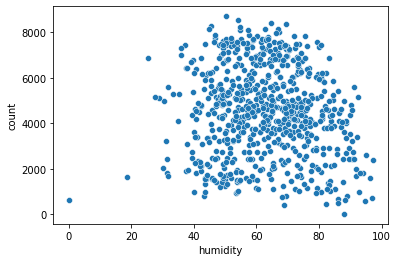

In [25]:
#plot the humidity column 
sns.scatterplot(x='humidity', y='count', data=df)
plt.show()

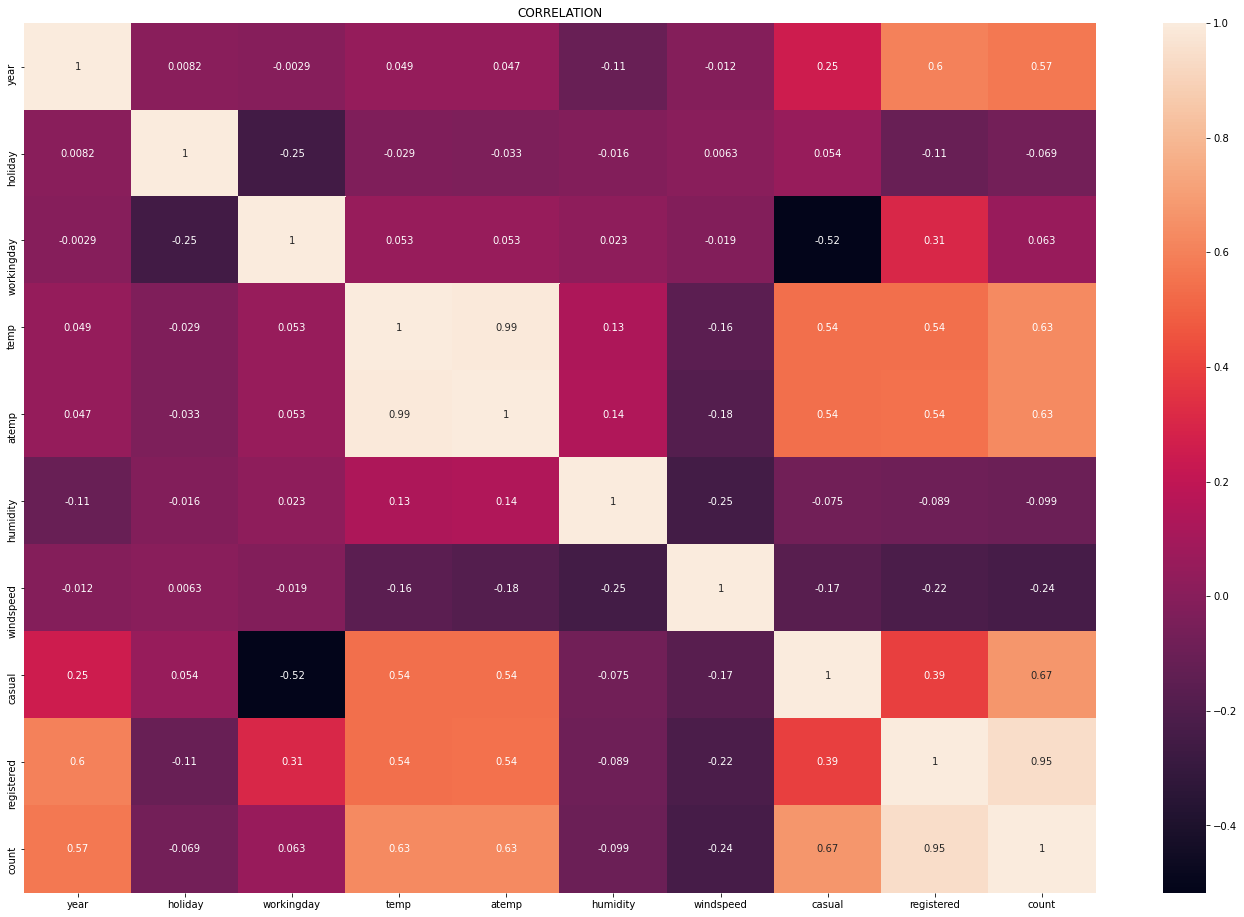

In [26]:
#lets plot a heatmap to check corr()
plt.figure(figsize=(24,16))
sns.heatmap(df.corr(), annot=True)
plt.title('CORRELATION')
plt.show()

In [27]:
#count is positively correlated with registered, casual, atemp, temp, workingday
#lets further drop unnecessary columns 
df.drop(['registered','casual','atemp','dteday'], axis=1, inplace=True)

In [28]:
df.head()
#the df is now looking nice and clean

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


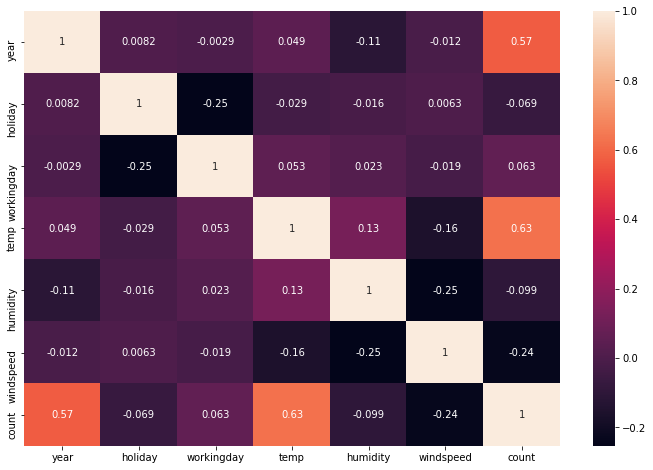

In [29]:
#lets check the corr() again 
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
#prep the data
#get dummies for season, month, weekday, weathersit
seasons = pd.get_dummies(df['season'], drop_first=True)
months = pd.get_dummies(df['month'], drop_first=True)
weekdays = pd.get_dummies(df['weekday'], drop_first=True)
weathersitu = pd.get_dummies(df['weathersit'], drop_first=True)

In [31]:
#concat dummies with df
df = pd.concat([seasons, months, weekdays, weathersitu, df] , axis=1)
#check df
df.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [32]:
#check new shape of df
df.shape

(730, 33)

In [33]:
#drop columns after adding dummy variables 
df.drop(['season', 'month','weekday','weathersit'], axis=1, inplace=True)
df.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


In [34]:
#recheck df shape
df.shape

(730, 29)

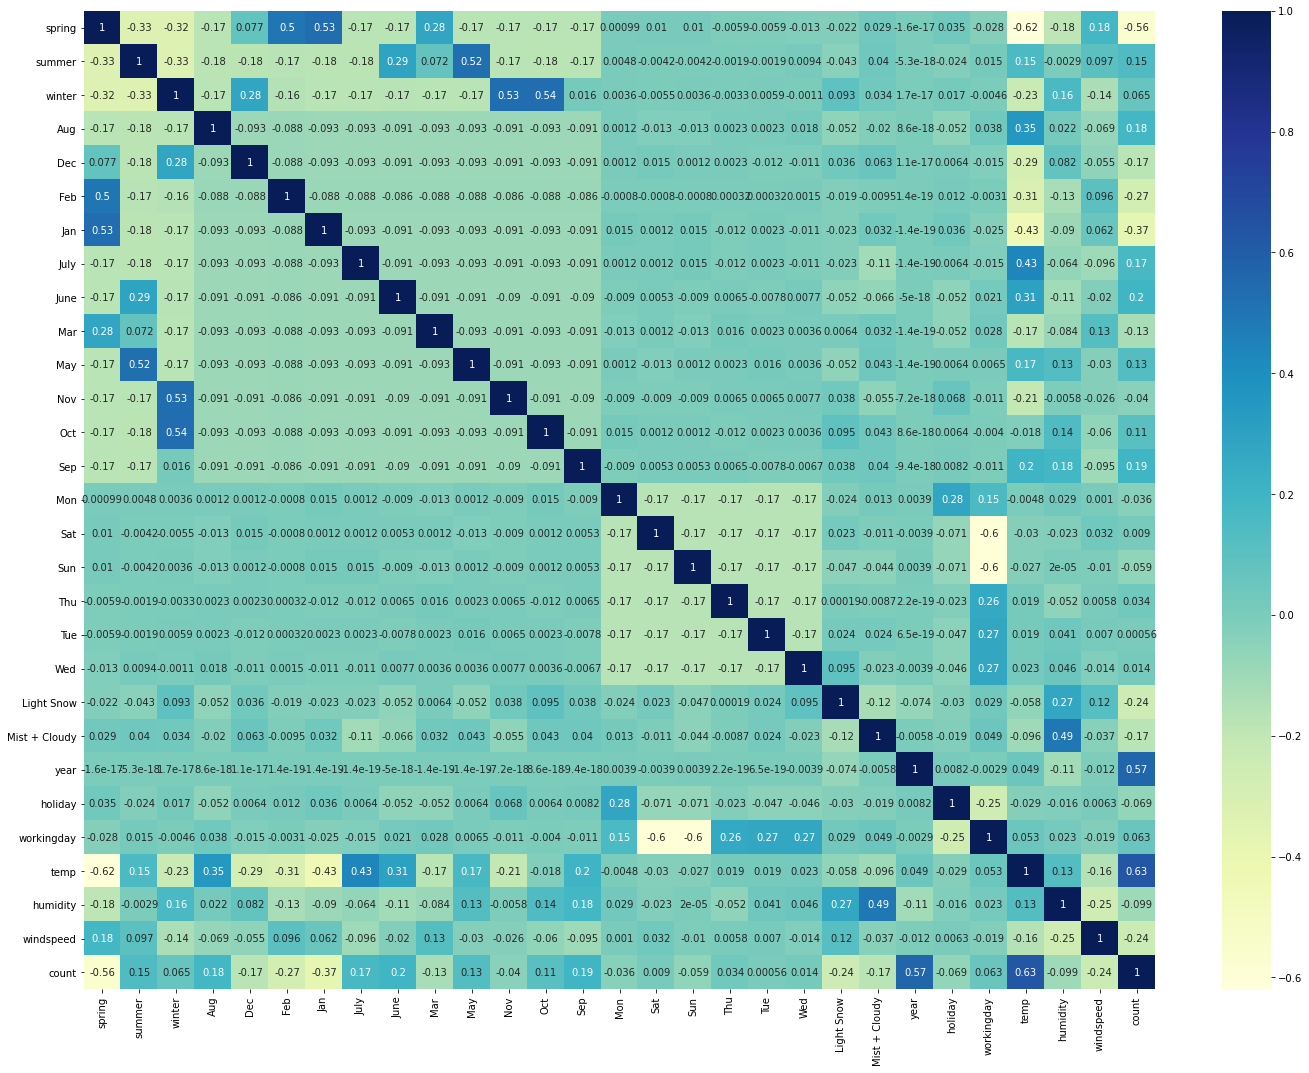

In [35]:
#run a corr matrix on new df 
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [36]:
#prep the data for model creation
#split the data into train and test datasets 
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [37]:
#check shape of train and test data set 
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [38]:
#scaling the data so interpretation is better 
#instantiate an object
scaler = MinMaxScaler()
#numeric variables list
target_num_vars = ['temp', 'humidity', 'windspeed', 'count']
#fit the data 
df_train[target_num_vars] = scaler.fit_transform(df_train[target_num_vars])
df_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.345824,0.751824,0.380981,0.191095


In [39]:
#check scaling results 
df_train.describe()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.158824,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.365870,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


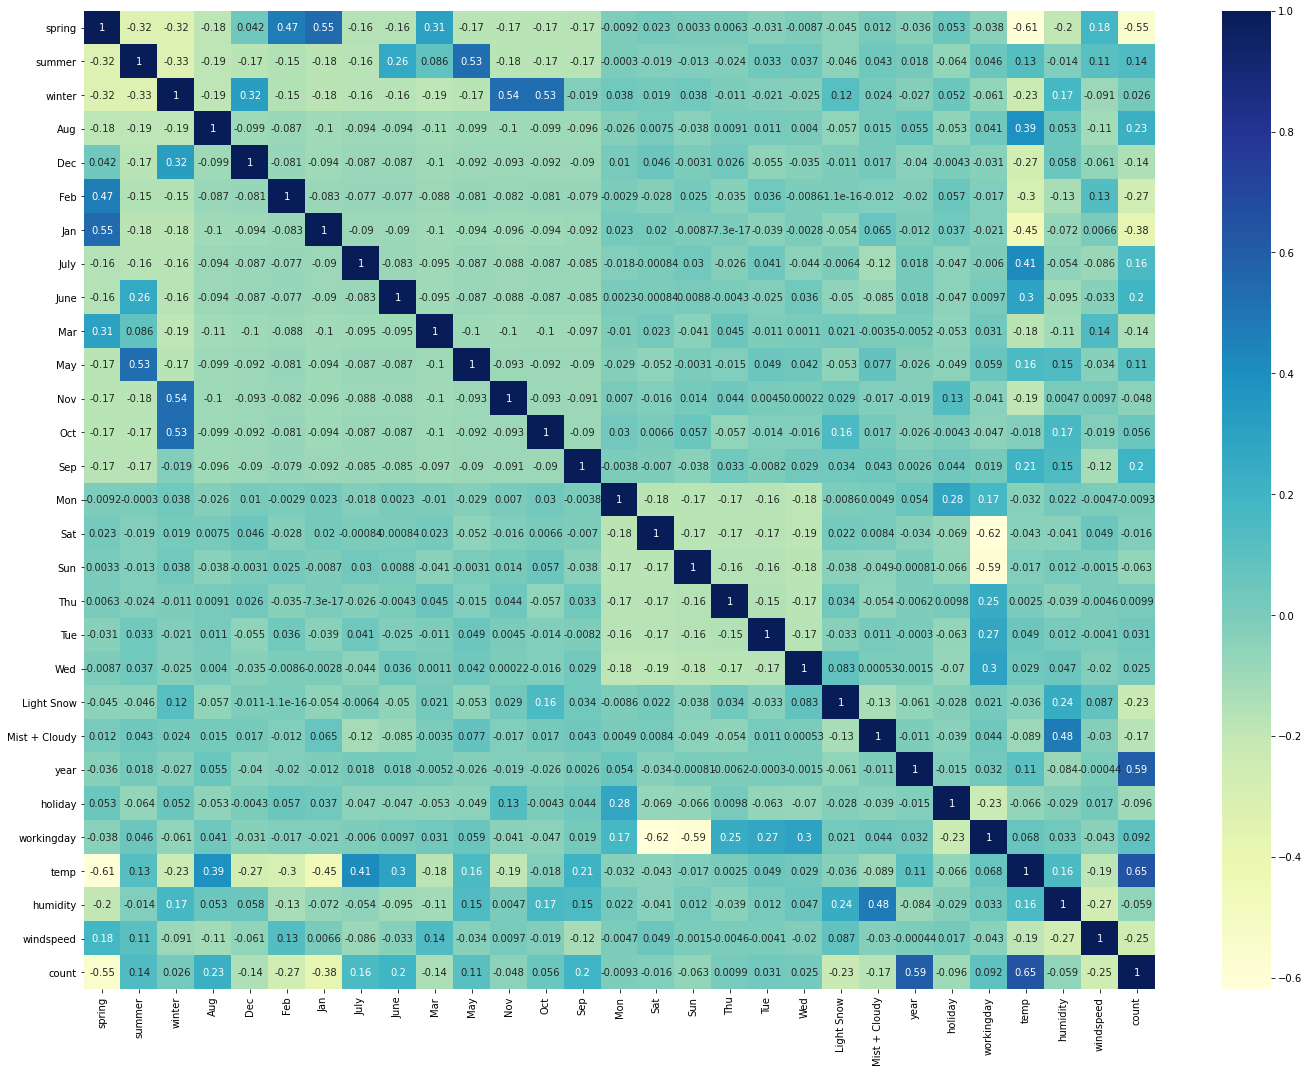

In [40]:
#runn corr() on training data post scaling 
plt.figure(figsize=(24,18))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [41]:
#lets now divide the data into X and y 
y_train = df_train.pop('count')
X_train = df_train

In [42]:
#check the training and test dataset 
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: count, dtype: float64

In [43]:
X_train.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Tue,Wed,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


In [44]:
#create an instance of the reg model 
lm = LinearRegression()
#fit the data
lm.fit(X_train, y_train)
#run RFE on the model with 15 features
rfe = RFE(lm, 15)
#fit the training data
rfe = rfe.fit(X_train, y_train)

In [45]:
#create list of cols where rfe support = true 
cols = X_train.columns[rfe.support_]
cols

Index(['spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [46]:
#create training df with with rfe = true
X_train_rfe = X_train[cols]
X_train_rfe.head()

,spring,summer,winter,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
111,0,1,0,0,0,0,0,0,1,0,0,1,0.345824,0.751824,0.380981


In [47]:
#add a constant
#run the linear model
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [48]:
#show stats
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          4.22e-191
Time:                        16:43:45   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969      0.000       0.181       0.323
spring           -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer            0.0508      0.015      3.423      0.001       0.022       0.080
winter            0.0933      0.017      5.403      0.000       0.059       0.127
Jan              -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July             -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep               0.0814      0.016      4.945      0.000       0.049       0.114
Sat               0.0536      0.014      3.694      0.000       0.025       0.082
Light Snow       -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist + Cloudy    -0.0563      0.010     -5.439      0.000      -0.077      -0.036
year              0.2305      0.008     28.795      0.000       0.215       0.246
holiday          -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday        0.0433      0.012      3.762      0.000       0.021       0.066
temp              0.5096      0.034     14.837      0.000       0.442       0.577
humidity         -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed        -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#drop the constant 
X_train_rfe =  X_train_rfe.drop(['const'], axis=1)

In [50]:
#calculate VIF for the model 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(ascending=False, by='VIF')
vif

,Features,VIF
13,humidity,29.37
12,temp,17.78
11,workingday,5.31
14,windspeed,4.73
0,spring,4.53
2,winter,3.46
1,summer,2.85
8,Mist + Cloudy,2.29
9,year,2.09
6,Sat,1.98


In [51]:
#lets drop the humidity feature due to its high collinearity 
X_train_one = X_train_rfe.drop(['humidity'], axis=1)

In [52]:
#add constant to df
X_train_lm_one = sm.add_constant(X_train_one)
#create object 
lm1 = sm.OLS(y_train, X_train_lm_one).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.60e-188
Time:                        16:43:45   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1737      0.031      5.520      0.000       0.112       0.235
spring           -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer            0.0445      0.015      2.967      0.003       0.015       0.074
winter            0.0784      0.017      4.562      0.000       0.045       0.112
Jan              -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July             -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep               0.0755      0.017      4.527      0.000       0.043       0.108
Sat               0.0583      0.015      3.968      0.000       0.029       0.087
Light Snow       -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist + Cloudy    -0.0813      0.009     -9.437      0.000      -0.098      -0.064
year              0.2345      0.008     29.009      0.000       0.219       0.250
holiday          -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday        0.0464      0.012      3.966      0.000       0.023       0.069
temp              0.4722      0.034     14.005      0.000       0.406       0.538
windspeed        -0.1563      0.025     -6.286      0.000      -0.205      -0.107
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#drop const before VIF
X_train_lm_one = X_train_lm_one.drop(['const'], axis=1)

In [54]:
#calculate VIF for the model lm_one
vif = pd.DataFrame()
X = X_train_one
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(ascending=False, by='VIF')
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.68
0,spring,3.07
1,summer,2.34
9,year,2.08
2,winter,1.98
6,Sat,1.97
3,Jan,1.62
4,July,1.59


In [55]:
#lets drop the holiday feature 
X_train_two = X_train_one.drop(['holiday'], axis=1)

In [56]:
#add a constant 
X_train_lm_two = sm.add_constant(X_train_two)

In [57]:
#run model 
lm2 = sm.OLS(y_train, X_train_lm_two).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.68e-189
Time:                        16:43:45   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1657      0.031      5.292      0.000       0.104       0.227
spring           -0.0607      0.021     -2.899      0.004      -0.102      -0.020
summer            0.0448      0.015      2.980      0.003       0.015       0.074
winter            0.0775      0.017      4.499      0.000       0.044       0.111
Jan              -0.0398      0.018     -2.252      0.025      -0.074      -0.005
July             -0.0468      0.018     -2.549      0.011      -0.083      -0.011
Sep               0.0736      0.017      4.406      0.000       0.041       0.106
Sat               0.0667      0.014      4.710      0.000       0.039       0.094
Light Snow       -0.2896      0.024    -11.895      0.000      -0.337      -0.242
Mist + Cloudy    -0.0807      0.009     -9.351      0.000      -0.098      -0.064
year              0.2346      0.008     28.941      0.000       0.219       0.251
workingday        0.0546      0.011      4.967      0.000       0.033       0.076
temp              0.4724      0.034     13.966      0.000       0.406       0.539
windspeed        -0.1572      0.025     -6.306      0.000      -0.206      -0.108
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#drop the const 
X_train_lm_two = X_train_lm_two.drop(['const'], axis=1)

In [59]:
#run VIF on lm_2
vif = pd.DataFrame()
X = X_train_two
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(ascending=False, by='VIF')
vif

,Features,VIF
11,temp,6.82
10,workingday,4.68
12,windspeed,4.66
0,spring,2.99
1,summer,2.33
9,year,2.08
2,winter,1.91
6,Sat,1.84
3,Jan,1.62
4,July,1.59


In [60]:
#lets drop the jan feature 
X_train_three = X_train_two.drop(['Jan'], axis=1)

In [61]:
#add a constant 
X_train_lm_three = sm.add_constant(X_train_three)

In [62]:
#afit the data
lm3 = sm.OLS(y_train, X_train_lm_three).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          7.12e-189
Time:                        16:43:45   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1492      0.031      4.881      0.000       0.089       0.209
spring           -0.0664      0.021     -3.182      0.002      -0.107      -0.025
summer            0.0481      0.015      3.196      0.001       0.019       0.078
winter            0.0838      0.017      4.910      0.000       0.050       0.117
July             -0.0486      0.018     -2.637      0.009      -0.085      -0.012
Sep               0.0740      0.017      4.414      0.000       0.041       0.107
Sat               0.0664      0.014      4.671      0.000       0.038       0.094
Light Snow       -0.2883      0.024    -11.795      0.000      -0.336      -0.240
Mist + Cloudy    -0.0817      0.009     -9.428      0.000      -0.099      -0.065
year              0.2339      0.008     28.756      0.000       0.218       0.250
workingday        0.0545      0.011      4.938      0.000       0.033       0.076
temp              0.4920      0.033     14.991      0.000       0.427       0.556
windspeed        -0.1499      0.025     -6.040      0.000      -0.199      -0.101
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
#drop the const
X_train_lm_three = X_train_lm_three.drop(['const'], axis=1)

In [64]:
#run VIF on lm_3
vif = pd.DataFrame()
X = X_train_three
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(ascending=False, by='VIF')
vif

,Features,VIF
10,temp,6.73
9,workingday,4.66
11,windspeed,4.64
0,spring,2.38
1,summer,2.32
8,year,2.07
2,winter,1.91
5,Sat,1.83
3,July,1.58
7,Mist + Cloudy,1.57


In [65]:
#lets drop the windspeed col
X_train_four = X_train_three.drop(['windspeed'], axis=1)
X_train_four.head()

,spring,summer,winter,July,Sep,Sat,Light Snow,Mist + Cloudy,year,workingday,temp
576,0,0,0,1,0,0,0,0,1,1,0.815169
426,1,0,0,0,0,1,0,1,1,0,0.442393
728,1,0,0,0,0,0,0,0,1,0,0.245101
482,0,1,0,0,0,1,0,1,1,0,0.395666
111,0,1,0,0,0,0,0,1,0,1,0.345824


In [66]:
#build a new model 
#add a const 
X_train_lm_four = sm.add_constant(X_train_four)
#add a constant to the lm model 
lm4 = sm.OLS(y_train, X_train_lm_four).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.94e-182
Time:                        16:43:46   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0989      0.030      3.248      0.001       0.039       0.159
spring           -0.0760      0.022     -3.528      0.000      -0.118      -0.034
summer            0.0381      0.015      2.462      0.014       0.008       0.068
winter            0.0850      0.018      4.811      0.000       0.050       0.120
July             -0.0487      0.019     -2.554      0.011      -0.086      -0.011
Sep               0.0783      0.017      4.517      0.000       0.044       0.112
Sat               0.0642      0.015      4.367      0.000       0.035       0.093
Light Snow       -0.3032      0.025    -12.045      0.000      -0.353      -0.254
Mist + Cloudy    -0.0799      0.009     -8.919      0.000      -0.098      -0.062
year              0.2329      0.008     27.665      0.000       0.216       0.249
workingday        0.0556      0.011      4.866      0.000       0.033       0.078
temp              0.5038      0.034     14.860      0.000       0.437       0.570
==============================================================================
Omnibus:                       76.254   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.812
Skew:                          -0.729   Prob(JB):                     1.67e-46
Kurtosis:                       5.792   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
X_train_lm_five = X_train_lm_four.drop(['const'], axis=1)

In [68]:
#run VIF on lm4
vif = pd.DataFrame()
X = X_train_four
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(ascending=False, by='VIF')
vif

,Features,VIF
10,temp,6.03
9,workingday,4.63
8,year,2.07
1,summer,2.06
5,Sat,1.81
0,spring,1.78
2,winter,1.73
3,July,1.58
7,Mist + Cloudy,1.57
4,Sep,1.34


In [69]:
##lets now predict the count
y_train_pred = lm4.predict(X_train_lm_four)

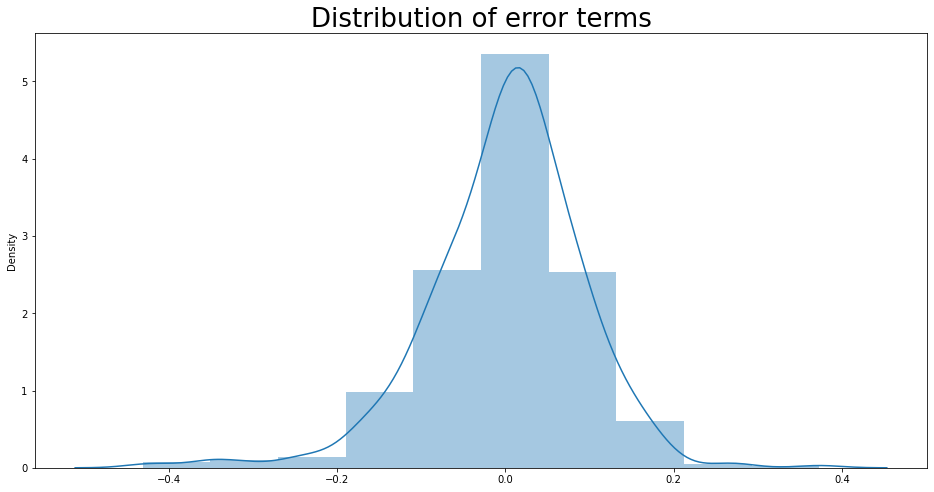

In [70]:
#plot the error terms to check for normal distribution 
plt.figure(figsize = (16,8))
sns.distplot((y_train - y_train_pred), bins=10)
plt.title('Distribution of error terms', fontsize = 26)
plt.show()
#error terms are normally distributed 

In [72]:
#making predictions
#instantiate an object 
scaler = MinMaxScaler()
final_num_vars = ['temp','humidity','windspeed','count']
df_test[final_num_vars] = scaler.fit_transform(df_test[final_num_vars])
df_test.head()

,spring,summer,winter,Aug,Dec,Feb,Jan,July,June,Mar,...,Wed,Light Snow,Mist + Cloudy,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0.837241,0.534223,0.149393,0.704300
535,0,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0.911423,0.470417,0.231142,0.725421
299,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0.496221,0.777843,0.443398,0.278853
221,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0.890387,0.236659,0.449707,0.545512
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0.821739,0.070765,0.682387,0.569148


In [73]:
#dividing into x and y
y_test = df_test.pop('count')
X_test = df_test

In [74]:
#check columns 
X_train_four.columns

Index(['spring', 'summer', 'winter', 'July', 'Sep', 'Sat', 'Light Snow',
       'Mist + Cloudy', 'year', 'workingday', 'temp'],
      dtype='object')

In [78]:
#using the model to make predictions
X_test_final = X_test[X_train_four.columns]
X_test_final_1 = sm.add_constant(X_test_final)
X_test_final_1.head()

,const,spring,summer,winter,July,Sep,Sat,Light Snow,Mist + Cloudy,year,workingday,temp
184,1.0,0,0,0,1,0,0,0,1,0,0,0.837241
535,1.0,0,1,0,0,0,0,0,0,1,1,0.911423
299,1.0,0,0,1,0,0,0,0,1,0,1,0.496221
221,1.0,0,0,0,0,0,0,0,0,0,1,0.890387
152,1.0,0,1,0,0,0,0,0,0,0,1,0.821739


In [80]:
#make predictions
y_pred = lm4.predict(X_test_final_1)

In [81]:
#get r2
r2_score(y_test, y_pred)

0.8086262754840595

In [98]:
#adj r2
adj_r2 = 1-(1-0.808626275484)*(11-1)/(11-1-1)
print('Adjusted r^2:', adj_r2)

Adjusted r^2: 0.7873625283155555


Text(0, 0.5, 'y_pred')

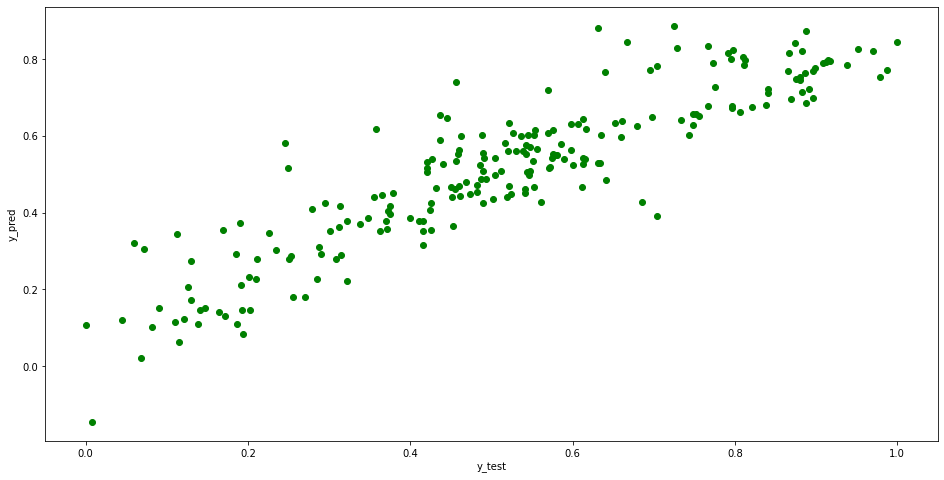

In [90]:
#plot y_test and y_pred
plt.figure(figsize = (16,8))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('y_test')
plt.ylabel('y_pred')

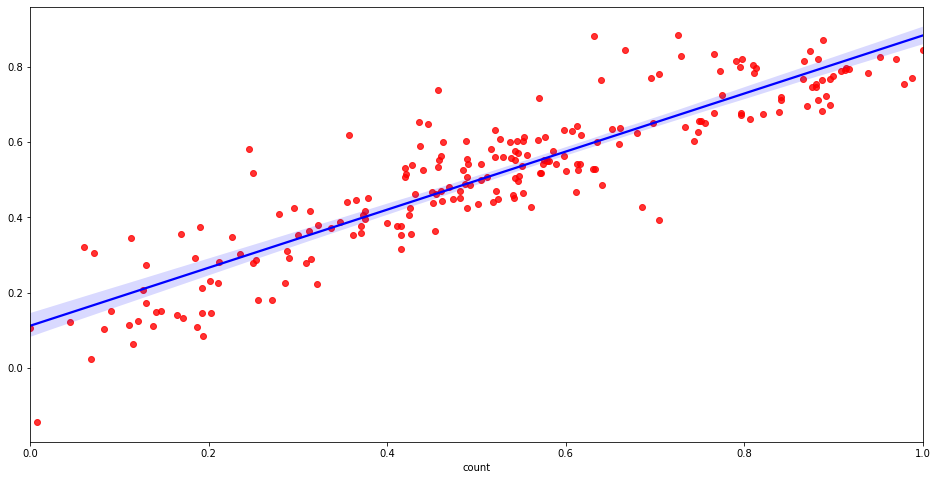

In [96]:
#plot a reg model 
plt.figure(figsize=(16,8))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, scatter_kws={'color':'red'}, 
            line_kws={'color':'blue'})
plt.show()